# Part 0: Sample dataset (LSD)

In 1968, Wagner Agahajanian, and Bing conducted a study to determine whether you could improve a student's math test scores using lysergic acid diethylamide, also known as "LSD."

Here is the original data sources. The code cell below downloads the file from an alternative location, for compatibility with the Azure Notebook or Vocareum platforms you are using.
* Raw data: http://www.stat.ufl.edu/~winner/data/lsd.dat
* Data file description: http://www.stat.ufl.edu/~winner/data/lsd.txt

In [1]:
from pandas import read_fwf
from IPython.display import display

import requests
import os
import hashlib
import io

def on_vocareum():
    return os.path.exists('.voc')

if on_vocareum():
    URL_BASE = "https://cse6040.gatech.edu/datasets/"
    DATA_PATH = "../resource/lib/publicdata/"
else:
    URL_BASE = "https://github.com/cse6040/labs-fa17/raw/master/datasets/"
    DATA_PATH = ""


def download(file, local_dir="", url_base=URL_BASE, checksum=None):
    local_file = "{}{}".format(local_dir, file)
    if not os.path.exists(local_file):
        url = "{}{}".format(url_base, file)
        print("Downloading: {} ...".format(url))
        r = requests.get(url)
        with open(local_file, 'wb') as f:
            f.write(r.content)
            
    if checksum is not None:
        with io.open(local_file, 'rb') as f:
            body = f.read()
            body_checksum = hashlib.md5(body).hexdigest()
            assert body_checksum == checksum, \
                "Downloaded file '{}' has incorrect checksum: '{}' instead of '{}'".format(local_file,
                                                                                           body_checksum,
                                                                                           checksum)
    print("'{}' is ready!".format(file))
    
datasets = {'lsd.dat': '4c119057baf86cff8da03d825d7ce141'}
for filename, checksum in datasets.items():
    download(filename, local_dir=DATA_PATH, url_base=URL_BASE, checksum=checksum)
print("\n(All data appears to be ready.)")

'lsd.dat' is ready!

(All data appears to be ready.)


Let's take a look at the data, first as a table and then using a scatter plot.

In [2]:
df = read_fwf('{}lsd.dat'.format(DATA_PATH),
              colspecs=[(0, 4), (7, 13)],
              names=['lsd_concentration', 'exam_score'])
display(df)

,lsd_concentration,exam_score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


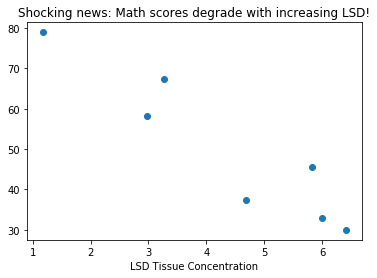

In [3]:
from matplotlib.pyplot import scatter, xlabel, title, plot
%matplotlib inline

scatter(df['lsd_concentration'], df['exam_score'])
xlabel ('LSD Tissue Concentration')
title ('Shocking news: Math scores degrade with increasing LSD!');

## Fitting a model

**Exercise 0** (2 points). Complete the function below so that it computes $\alpha$ and $\beta$ for the univariate model, $y \sim \alpha \cdot x + \beta$, given observations stored as NumPy arrays `y[:]` for the responses and `x[:]` for the predictor.

Use the linear regression formulas derived in class.

In [5]:
def linreg_fit(x, y):
    """Returns (alpha, beta) s.t. y ~ alpha*x + beta."""
    from numpy import ones
    m = len(x) ; assert len(y) == m
    
    #
    # YOUR CODE HERE
    u = ones(m)
    alpha = x.dot(y) - u.dot(x)*u.dot(y)/m
    alpha /= x.dot(x) - (u.dot(x)**2)/m
    beta = u.dot(y - alpha*x)/m

    return (alpha, beta)

# Compute the coefficients for the LSD data:
x, y = df['lsd_concentration'], df['exam_score']
alpha, beta = linreg_fit(x, y)

print("alpha:", alpha)
print("beta:", beta)

alpha: -9.0094664153
beta: 89.123873768


In [6]:
# Test cell: `linreg_fit_test`

x, y = df['lsd_concentration'], df['exam_score']
alpha, beta = linreg_fit(x, y)
alpha, beta = -9, 89

r = alpha*x + beta - y
ssqr = r.dot(r)
ssqr_ex = 253.88132881

from numpy import isclose
assert isclose(ssqr, ssqr_ex, rtol=.01), "Sum-of-squared residuals is {} instead of {}.".format(ssqr, ssqr_ex)

print("\n(Passed!)")


(Passed!)


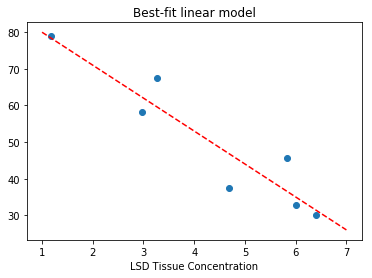

In [7]:
from numpy import linspace, floor, ceil

# Two points make a line:
x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
y_fit = alpha*x_fit + beta

scatter(x, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('LSD Tissue Concentration')
title('Best-fit linear model');

**Fin!** If you've gotten this far without errors, your notebook is ready to submit.